In [1]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


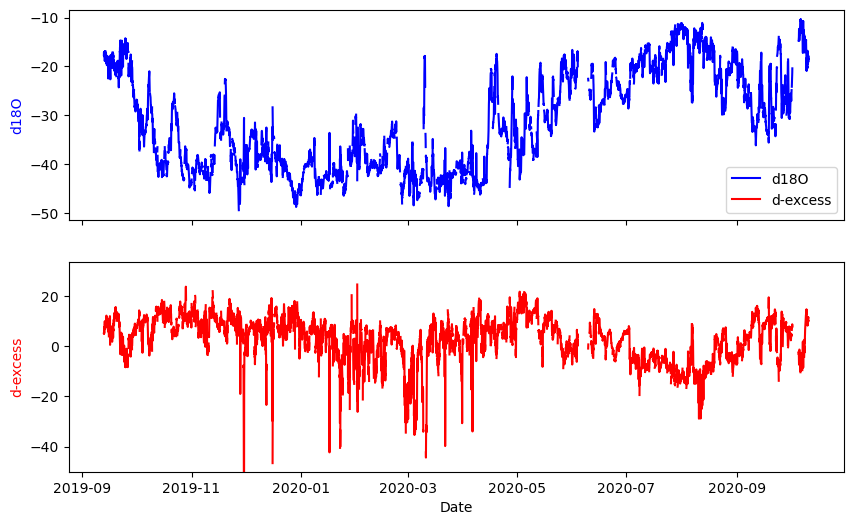

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\TS Vapour and Snow\Vap_All.xlsx"
df = pd.read_excel(file_path)

# Convert DateTime column to datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as the DataFrame index
df.set_index('DateTime', inplace=True)

# Select numeric columns for calculation
numeric_columns = ['d18O', 'd-excess']
df_numeric = df[numeric_columns]

# Calculate the hourly running mean
hourly_mean = df_numeric.resample('1H').mean(numeric_only=True)

# Plotting the time series
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plotting d18O on axes[0]
axes[0].plot(hourly_mean.index, hourly_mean['d18O'], color='blue', label='d18O')
axes[0].set_ylabel('d18O', color='blue')

# Plotting d-excess on axes[1]
axes[1].plot(hourly_mean.index, hourly_mean['d-excess'], color='red', label='d-excess')
axes[1].set_ylabel('d-excess', color='red')
axes[1].set_ylim(-50, None)  # Set the y-axis limit to values greater than -50

# Formatting x-axis as dates
axes[1].xaxis_date()

# Adding legend
lines = axes[0].get_lines() + axes[1].get_lines()
labels = [line.get_label() for line in lines]
axes[0].legend(lines, labels)

# Add title to x-axis
axes[1].set_xlabel('Date')

# Display the plot
plt.show()



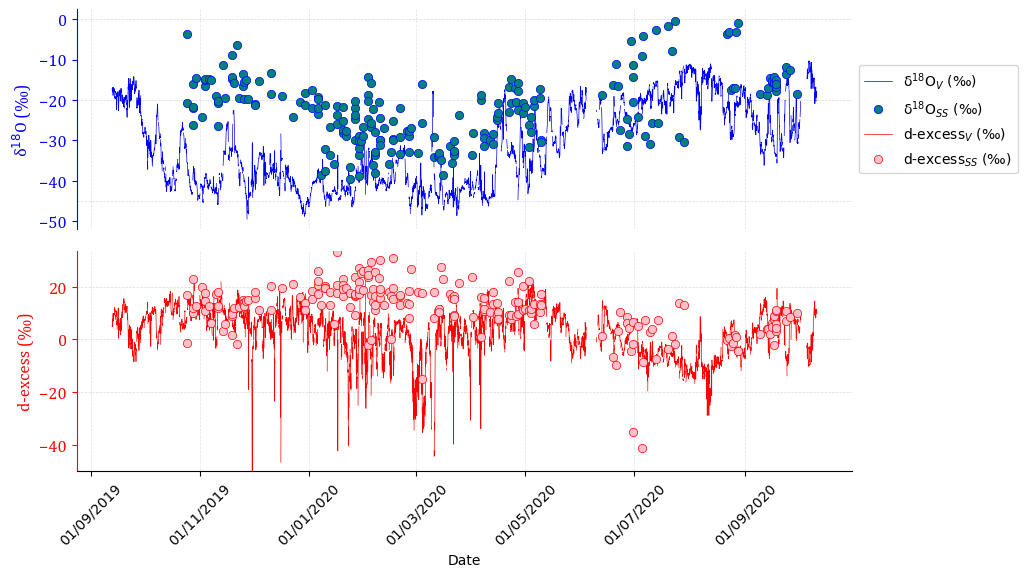

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Excel file
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\TS Vapour and Snow\Vap_All.xlsx"
df = pd.read_excel(file_path)

# Convert DateTime column to datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as the DataFrame index
df.set_index('DateTime', inplace=True)

# Select numeric columns for calculation
numeric_columns = ['d18O', 'd-excess']
df_numeric = df[numeric_columns]

# Calculate the hourly running mean
hourly_mean = df_numeric.resample('1H').mean(numeric_only=True)

# Plotting the time series
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Set the font to "Cambria"
font_name = "Cambria"

# Plotting d18O on axes[0]
axes[0].plot(hourly_mean.index, hourly_mean['d18O'], color='blue', label="δ$^{18}$O$_{V}$ (‰)", linewidth=0.5)
axes[0].set_ylabel("δ$^{18}$O (‰)", fontname=font_name, fontsize=12, color='blue')
axes[0].axhline(0, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[0].axhline(-20, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[0].axhline(-45, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)

# Plotting d-excess on axes[1]
axes[1].plot(hourly_mean.index, hourly_mean['d-excess'], color='red', label="d-excess$_{V}$ (‰)", linewidth=0.5)
axes[1].set_ylabel("d-excess (‰)", fontname=font_name, fontsize=12, color='red')
axes[1].set_ylim(-50, None)  # Set the y-axis limit to values greater than -50
axes[1].axhline(20, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[1].axhline(0, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[1].axhline(-20, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)

# Add title to x-axis
axes[1].set_xlabel('Date')
# Format the x-axis tick labels
date_format = mdates.DateFormatter("%d/%m/%Y")
axes[1].xaxis.set_major_formatter(date_format)

# Import and plot new data
new_data_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\CiASOM_SLF_Corrected.xlsx"
new_data_sheet = "Surface_Snow"
new_data_df = pd.read_excel(new_data_file_path, sheet_name=new_data_sheet)

new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])
new_data_df.set_index('Date', inplace=True)

new_data_numeric_columns = ['d18O', 'd_excess']
new_data_df_numeric = new_data_df[new_data_numeric_columns]

# Plotting new data as single dots
axes[0].plot(new_data_df_numeric.index, new_data_df_numeric['d18O'], 'bo', label="δ$^{18}$O$_{SS}$ (‰)", markersize=6, markerfacecolor='teal', markeredgewidth=0.5, markeredgecolor='blue')
axes[1].plot(new_data_df_numeric.index, new_data_df_numeric['d_excess'], 'ro', label="d-excess$_{SS}$ (‰)", markersize=6, markerfacecolor='pink', markeredgewidth=0.5, markeredgecolor='red')

# Adding legend
lines = axes[0].get_lines() + axes[1].get_lines()
labels = [line.get_label() for line in lines]
filtered_labels = [label for label in labels if not label.startswith('_')]
handles = [line for line, label in zip(lines, labels) if label in filtered_labels]
legend = axes[0].legend(handles, filtered_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Update legend
lines = axes[0].get_lines() + axes[1].get_lines()
labels = [line.get_label() for line in lines]
filtered_labels = [label for label in labels if not label.startswith('_')]
handles = [line for line, label in zip(lines, labels) if label in filtered_labels]
legend = axes[0].legend(handles, filtered_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Remove the box around each subplot
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(ax.get_lines()[0].get_color())  # Set y-axis line color to match the line color
    if ax != axes[-1]:
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-axis ticks

# Add grid lines at every tick of x-axis
for ax in axes:
    ax.grid(axis='x', which='major', linestyle='--', linewidth=0.5, alpha=0.4)
    ax.set_axisbelow(True)
    
# Set the font size and font family for tick labels on the y-axis
for ax in axes:
    ax.tick_params(axis='y', labelsize=12, colors=ax.get_lines()[0].get_color())
    ax.yaxis.set_major_locator(plt.FixedLocator(ax.get_yticks()))
    ax.set_yticklabels(ax.get_yticklabels(), fontname='Cambria')
                   
# Set the font size and font family for tick labels on the x-axis
for ax in axes:
    ax.tick_params(axis='x', labelsize=10, labelrotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1)

# Save the plot as a JPEG file
plt.savefig(r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\TS Vapour and Snow/TS_Isotopes_2806.jpeg", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


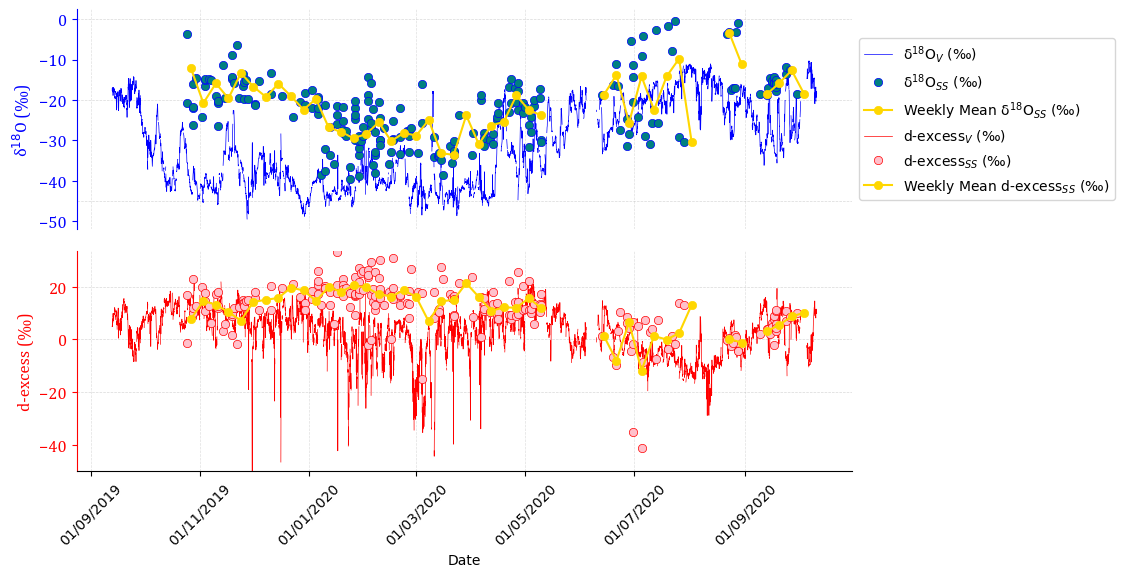

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Excel file
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\TS Vapour and Snow\Vap_All.xlsx"
df = pd.read_excel(file_path)

# Convert DateTime column to datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as the DataFrame index
df.set_index('DateTime', inplace=True)

# Select numeric columns for calculation
numeric_columns = ['d18O', 'd-excess']
df_numeric = df[numeric_columns]

# Calculate the hourly running mean
hourly_mean = df_numeric.resample('1H').mean(numeric_only=True)

# Plotting the time series
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Set the font to "Cambria"
font_name = "Cambria"

# Plotting d18O on axes[0]
axes[0].plot(hourly_mean.index, hourly_mean['d18O'], color='blue', label="δ$^{18}$O$_{V}$ (‰)", linewidth=0.5)
axes[0].set_ylabel("δ$^{18}$O (‰)", fontname=font_name, fontsize=12, color='blue')
axes[0].axhline(0, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[0].axhline(-20, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[0].axhline(-45, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)

# Plotting d-excess on axes[1]
axes[1].plot(hourly_mean.index, hourly_mean['d-excess'], color='red', label="d-excess$_{V}$ (‰)", linewidth=0.5)
axes[1].set_ylabel("d-excess (‰)", fontname=font_name, fontsize=12, color='red')
axes[1].set_ylim(-50, None)  # Set the y-axis limit to values greater than -50
axes[1].axhline(20, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[1].axhline(0, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[1].axhline(-20, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)

# Add title to x-axis
axes[1].set_xlabel('Date')
# Format the x-axis tick labels
date_format = mdates.DateFormatter("%d/%m/%Y")
axes[1].xaxis.set_major_formatter(date_format)

# Import and plot new data
new_data_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\CiASOM_SLF_Corrected.xlsx"
new_data_sheet = "Surface_Snow"
new_data_df = pd.read_excel(new_data_file_path, sheet_name=new_data_sheet)

new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])
new_data_df.set_index('Date', inplace=True)

new_data_numeric_columns = ['d18O', 'd_excess']
new_data_df_numeric = new_data_df[new_data_numeric_columns]

# Plotting new data as single dots
axes[0].plot(new_data_df_numeric.index, new_data_df_numeric['d18O'], 'bo', label="δ$^{18}$O$_{SS}$ (‰)", markersize=6, markerfacecolor='teal', markeredgewidth=0.5, markeredgecolor='blue')
axes[1].plot(new_data_df_numeric.index, new_data_df_numeric['d_excess'], 'ro', label="d-excess$_{SS}$ (‰)", markersize=6, markerfacecolor='pink', markeredgewidth=0.5, markeredgecolor='red')

# Import and plot new data
new_data_file_path_2 = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\weekly_surface_snow.csv"
weekly_data = pd.read_csv(new_data_file_path_2)
# Set the 'Date' column as datetime type
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'], format="%d/%m/%Y")

# Set the 'Date' column as the index
weekly_data.set_index('Date', inplace=True)

# Plotting new data as single dots
axes[0].plot(weekly_data.index, weekly_data['d18O'], 'o-', color='gold', label="Weekly Mean δ$^{18}$O$_{SS}$ (‰)", markersize=6, markerfacecolor='gold', markeredgewidth=0.5, markeredgecolor='gold')
axes[1].plot(weekly_data.index, weekly_data['d_excess'], 'o-', color='gold', label="Weekly Mean d-excess$_{SS}$ (‰)", markersize=6, markerfacecolor='gold', markeredgewidth=0.5, markeredgecolor='gold')

# Adding legend
lines = axes[0].get_lines() + axes[1].get_lines()
labels = [line.get_label() for line in lines]
filtered_labels = [label for label in labels if not label.startswith('_')]
handles = [line for line, label in zip(lines, labels) if label in filtered_labels]
legend = axes[0].legend(handles, filtered_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Update legend
lines = axes[0].get_lines() + axes[1].get_lines()
labels = [line.get_label() for line in lines]
filtered_labels = [label for label in labels if not label.startswith('_')]
handles = [line for line, label in zip(lines, labels) if label in filtered_labels]
legend = axes[0].legend(handles, filtered_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Remove the box around each subplot
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(ax.get_lines()[0].get_color())  # Set y-axis line color to match the line color
    if ax != axes[-1]:
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-axis ticks

# Add grid lines at every tick of x-axis
for ax in axes:
    ax.grid(axis='x', which='major', linestyle='--', linewidth=0.5, alpha=0.4)
    ax.set_axisbelow(True)
    
# Set the font size and font family for tick labels on the y-axis
for ax in axes:
    ax.tick_params(axis='y', labelsize=12, colors=ax.get_lines()[0].get_color())
    ax.yaxis.set_major_locator(plt.FixedLocator(ax.get_yticks()))
    ax.set_yticklabels(ax.get_yticklabels(), fontname='Cambria')
                   
# Set the font size and font family for tick labels on the x-axis
for ax in axes:
    ax.tick_params(axis='x', labelsize=10, labelrotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1)

# Save the plot as a JPEG file
plt.savefig(r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\TS Vapour and Snow/TS_Isotopes_Weekly_2806.jpeg", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

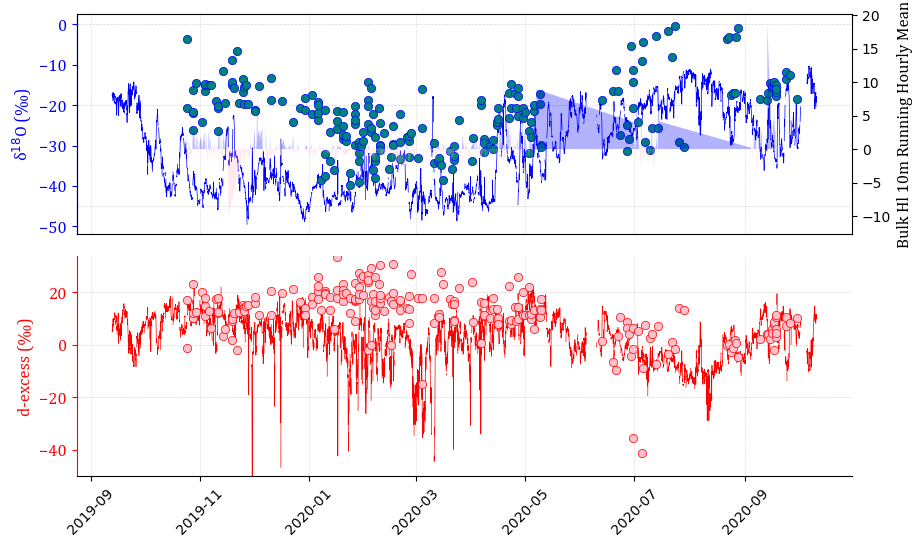

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Excel file
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\TS Vapour and Snow\Vap_All.xlsx"
df = pd.read_excel(file_path)

# Convert DateTime column to datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime as the DataFrame index
df.set_index('DateTime', inplace=True)

# Select numeric columns for calculation
numeric_columns = ['d18O', 'd-excess']
df_numeric = df[numeric_columns]

# Calculate the hourly running mean
hourly_mean = df_numeric.resample('1H').mean(numeric_only=True)

# Plotting the time series
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Set the font to "Cambria"
font_name = "Cambria"

# Plotting d18O on axes[0]
axes[0].plot(hourly_mean.index, hourly_mean['d18O'], color='blue', label="δ$^{18}$O$_{V}$ (‰)", linewidth=0.5)
axes[0].set_ylabel("δ$^{18}$O (‰)", fontname=font_name, fontsize=12, color='blue')
axes[0].axhline(0, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[0].axhline(-20, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[0].axhline(-45, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)

# Plotting d-excess on axes[1]
axes[1].plot(hourly_mean.index, hourly_mean['d-excess'], color='red', label="d-excess$_{V}$ (‰)", linewidth=0.5)
axes[1].set_ylabel("d-excess (‰)", fontname=font_name, fontsize=12, color='red')
axes[1].set_ylim(-50, None)  # Set the y-axis limit to values greater than -50
axes[1].axhline(20, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[1].axhline(0, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)
axes[1].axhline(-20, color="gray", linestyle="--", linewidth=0.5, alpha=0.3, zorder=0)

# Import and plot new data
new_data_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\CiASOM_SLF_Corrected.xlsx"
new_data_sheet = "Surface_Snow"
new_data_df = pd.read_excel(new_data_file_path, sheet_name=new_data_sheet)

new_data_df['Date'] = pd.to_datetime(new_data_df['Date'])
new_data_df.set_index('Date', inplace=True)

new_data_numeric_columns = ['d18O', 'd_excess']
new_data_df_numeric = new_data_df[new_data_numeric_columns]

# Plotting new data as single dots
axes[0].plot(new_data_df_numeric.index, new_data_df_numeric['d18O'], 'bo', label="δ$^{18}$O$_{SS}$ (‰)", markersize=6, markerfacecolor='teal', markeredgewidth=0.5, markeredgecolor='blue')
axes[1].plot(new_data_df_numeric.index, new_data_df_numeric['d_excess'], 'ro', label="d-excess$_{SS}$ (‰)", markersize=6, markerfacecolor='pink', markeredgewidth=0.5, markeredgecolor='red')

# Add second y-axis
second_yaxis_data_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\Met City\RStudio/Cleared_Hourly_Varibales_2.xlsx"
second_yaxis_sheet = "Sheet 1"
second_yaxis_df = pd.read_excel(second_yaxis_data_file_path, sheet_name=second_yaxis_sheet)

second_yaxis_df['DateTime'] = pd.to_datetime(second_yaxis_df['DateTime'])
second_yaxis_df.set_index('DateTime', inplace=True)

second_yaxis_column = 'bulk_Hl_10m_RunningHourlyMean'
second_yaxis_data = second_yaxis_df[second_yaxis_column]

# Plotting the second y-axis on axes[0]
axes2 = axes[0].twinx()
axes2.fill_between(second_yaxis_data.index, second_yaxis_data, 0, where=second_yaxis_data >= 0, facecolor='blue', interpolate=True, alpha=0.3)
axes2.fill_between(second_yaxis_data.index, second_yaxis_data, 0, where=second_yaxis_data < 0, facecolor='pink', interpolate=True, alpha=0.3)
axes2.set_ylabel("Bulk Hl 10m Running Hourly Mean", fontname=font_name, fontsize=12)

# Remove the box around each subplot
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(ax.get_lines()[0].get_color())  # Set y-axis line color to match the line color
    if ax != axes[-1]:
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-axis ticks

# Add grid lines at every tick of x-axis
for ax in axes:
    ax.grid(axis='x', which='major', linestyle='--', linewidth=0.5, alpha=0.4)
    ax.set_axisbelow(True)
    
# Set the font size and font family for tick labels on the y-axis
for ax in axes:
    ax.tick_params(axis='y', labelsize=12, colors=ax.get_lines()[0].get_color())
    ax.yaxis.set_major_locator(plt.FixedLocator(ax.get_yticks()))
    ax.set_yticklabels(ax.get_yticklabels(), fontname='Cambria')

# Set the font size and font family for tick labels on the x-axis
for ax in axes:
    ax.tick_params(axis='x', labelsize=10, labelrotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.1)

# Save the plot as a JPEG file
plt.savefig(r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\TS Vapour and Snow/TS_Isotopes_1007.jpeg", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

